# Visualisatie
Werk hier per cell alle visualisaties uit.
Voor elke business question moet er minimaal één visualisatie zijn.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
from constants import DB_PARAMS

In [2]:
def import_view(view_name):

    # Connect to the database
    conn = psycopg2.connect(**DB_PARAMS)
    cursor = conn.cursor()
    
    # Execute the query to fetch data from the view
    view_name_2 = f'postgres.models.{view_name}'
    query = f"SELECT * FROM {view_name_2}"
    cursor.execute(query)
    
    # Fetch all the rows
    rows = cursor.fetchall()
    
    # Get column names
    col_names = [desc[0] for desc in cursor.description]
    
    # Create DataFrame
    df = pd.DataFrame(rows, columns=col_names)
    
    # Close the cursor and connection
    cursor.close()
    conn.close()
    
    return df


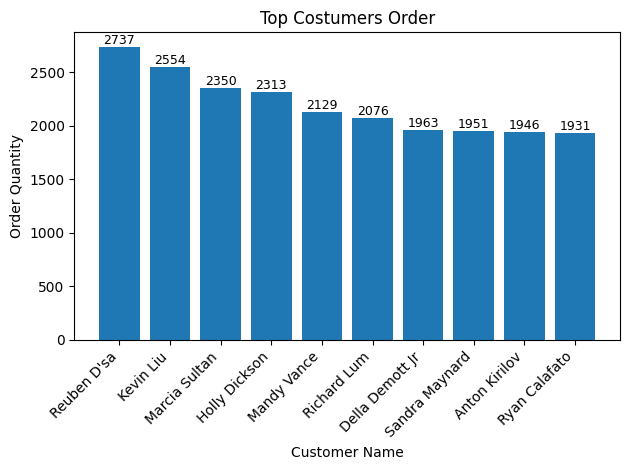

 total_order_qty       full_name
            2737     Reuben D'sa
            2554       Kevin Liu
            2350   Marcia Sultan
            2313   Holly Dickson
            2129     Mandy Vance
            2076     Richard Lum
            1963 Della Demott Jr
            1951  Sandra Maynard
            1946   Anton Kirilov
            1931   Ryan Calafato


In [3]:
df_top_cust = import_view('top_costumers_order_qty')

plt.bar(df_top_cust['full_name'], df_top_cust['total_order_qty'])
plt.xlabel('Customer Name')
plt.ylabel('Order Quantity')
plt.title('Top Costumers Order')
plt.xticks(rotation=45, ha='right')

for i, value in enumerate(df_top_cust['total_order_qty']):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=9)

plt.tight_layout() 
plt.show()
print(df_top_cust[['total_order_qty', 'full_name']].to_string(index=False))


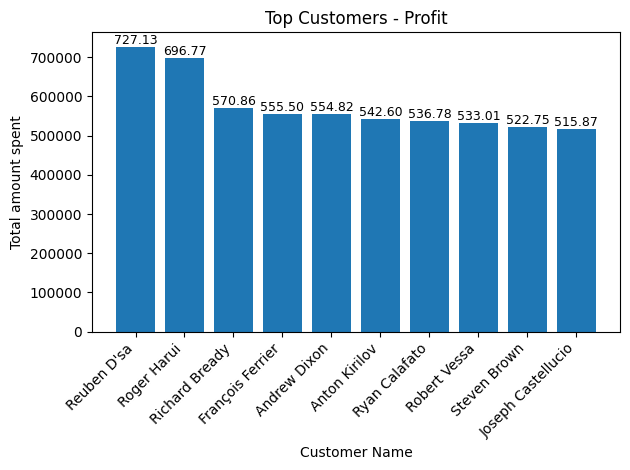

total_amount_spent          full_name
         727133.87        Reuben D'sa
         696768.17        Roger Harui
         570863.22     Richard Bready
         555502.76   François Ferrier
         554821.85       Andrew Dixon
         542601.56      Anton Kirilov
         536775.07      Ryan Calafato
         533013.60       Robert Vessa
         522745.50       Steven Brown
         515866.67 Joseph Castellucio


In [4]:
df_top_cust_profit = import_view('top_customers_profit')

plt.bar(df_top_cust_profit['full_name'], df_top_cust_profit['total_amount_spent'])
plt.xlabel('Customer Name')
plt.ylabel('Total amount spent')
plt.title('Top Customers - Profit')
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(df_top_cust_profit['total_amount_spent']):
    plt.text(i, value, str(round(value/1000, 2)), ha='center', va='bottom', fontsize=9)

plt.tight_layout() 
plt.show()
print(df_top_cust_profit[['total_amount_spent', 'full_name']].to_string(index=False))


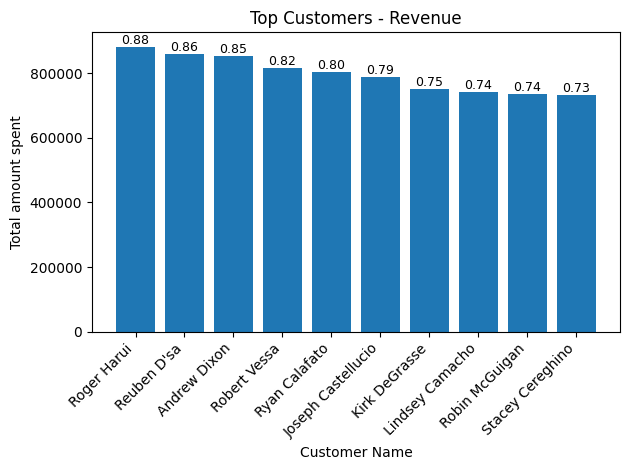

total_amount_spent          full_name
         882273.53        Roger Harui
         860142.25        Reuben D'sa
         853848.29       Andrew Dixon
         817125.03       Robert Vessa
         803767.27      Ryan Calafato
         787806.32 Joseph Castellucio
         751629.56      Kirk DeGrasse
         741360.41    Lindsey Camacho
         735233.10     Robin McGuigan
         731634.54   Stacey Cereghino


In [5]:
df_top_cust_rev = import_view('top_customers_revenue')

plt.bar(df_top_cust_rev['full_name'], df_top_cust_rev['total_amount_spent'])
plt.xlabel('Customer Name')
plt.ylabel('Total amount spent')
plt.title('Top Customers - Revenue')
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(df_top_cust_rev['total_amount_spent']):
    plt.text(i, value, str(round(value/1000000, 2)), ha='center', va='bottom', fontsize=9)

plt.tight_layout() 
plt.show()
print(df_top_cust_rev[['total_amount_spent', 'full_name']].to_string(index=False))

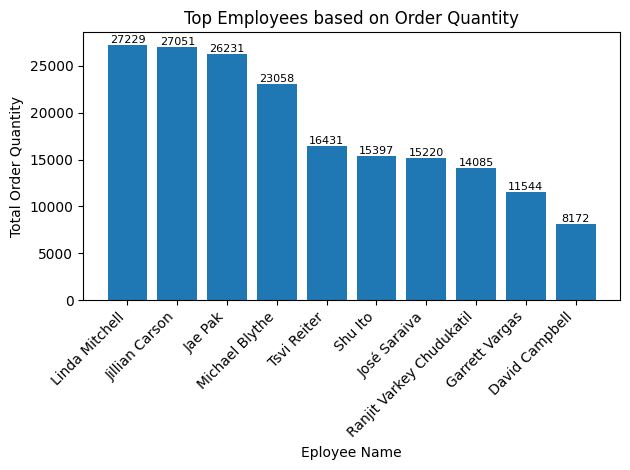

 total_order_qty                full_name
           27229           Linda Mitchell
           27051           Jillian Carson
           26231                  Jae Pak
           23058           Michael Blythe
           16431              Tsvi Reiter
           15397                  Shu Ito
           15220             José Saraiva
           14085 Ranjit Varkey Chudukatil
           11544           Garrett Vargas
            8172           David Campbell


In [6]:
df_top_employees_order_qty = import_view('top_employees_order_qty')

plt.bar(df_top_employees_order_qty['full_name'], df_top_employees_order_qty['total_order_qty'])
plt.xlabel('Employee Name')
plt.ylabel('Total Order Quantity')
plt.title('Top Employees based on Order Quantity')
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(df_top_employees_order_qty['total_order_qty']):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom', fontsize=8)

plt.tight_layout() 
plt.show()
print(df_top_employees_order_qty[['total_order_qty', 'full_name']].to_string(index=False))

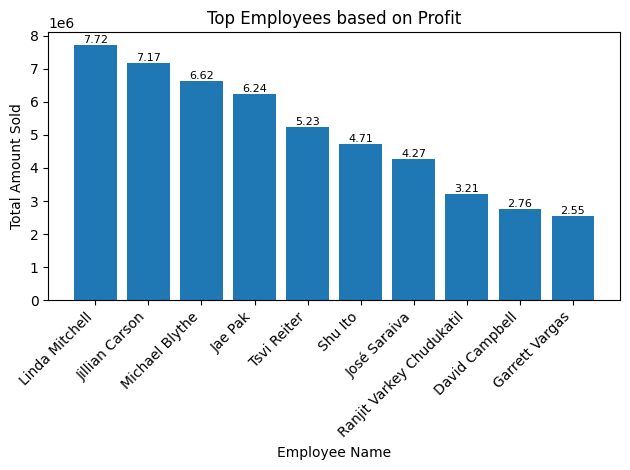

total_profit                full_name
  7717759.62           Linda Mitchell
  7168089.19           Jillian Carson
  6624864.09           Michael Blythe
  6238905.43                  Jae Pak
  5232347.97              Tsvi Reiter
  4711667.70                  Shu Ito
  4268289.38             José Saraiva
  3211754.63 Ranjit Varkey Chudukatil
  2764254.43           David Campbell
  2553251.15           Garrett Vargas


In [7]:
df_top_employees_profit = import_view('top_employees_profit')

plt.bar(df_top_employees_profit['full_name'], df_top_employees_profit['total_profit'])
plt.xlabel('Employee Name')
plt.ylabel('Total Amount Sold')
plt.title('Top Employees based on Profit')
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(df_top_employees_profit['total_profit']):
    plt.text(i, value, str(round(value/1000000, 2)), ha='center', va='bottom', fontsize=8)

plt.tight_layout() 
plt.show()
print(df_top_employees_profit[['total_profit', 'full_name']].to_string(index=False))

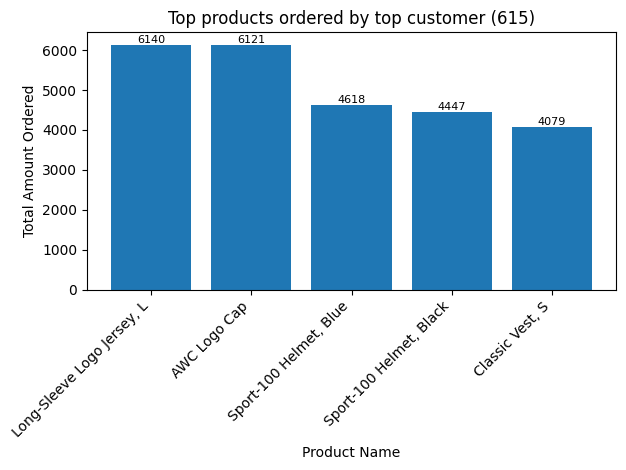

 total_order_qty               product_name
            6140 Long-Sleeve Logo Jersey, L
            6121               AWC Logo Cap
            4618     Sport-100 Helmet, Blue
            4447    Sport-100 Helmet, Black
            4079            Classic Vest, S


In [8]:
df_top_products_customer_615 = import_view('top_products_customer_615')

plt.bar(df_top_products_customer_615['product_name'], df_top_products_customer_615['total_order_qty'])
plt.xlabel('Product Name')
plt.ylabel('Total Amount Ordered')
plt.title('Top products ordered by top customer (615)')
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(df_top_products_customer_615['total_order_qty']):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom', fontsize=8)

plt.tight_layout() 
plt.show()
print(df_top_products_customer_615[['total_order_qty', 'product_name']].to_string(index=False))

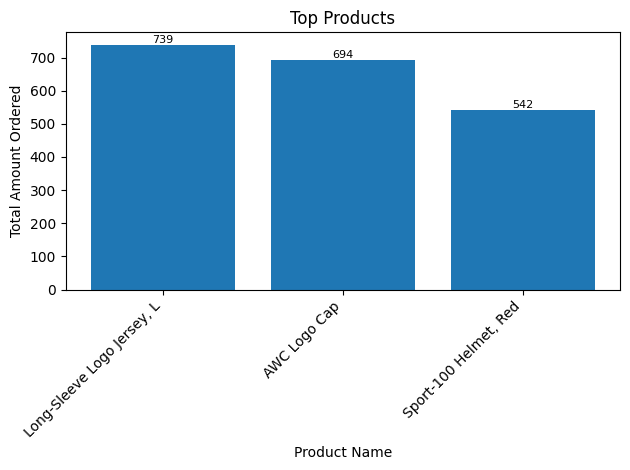

 total_order_qty               product_name
             739 Long-Sleeve Logo Jersey, L
             694               AWC Logo Cap
             542      Sport-100 Helmet, Red


In [9]:
df_top_selling_products = import_view('top_selling_products')

plt.bar(df_top_selling_products['product_name'], df_top_selling_products['total_order_qty'])
plt.xlabel('Product Name')
plt.ylabel('Total Amount Ordered')
plt.title('Top Products')
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(df_top_selling_products['total_order_qty']):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom', fontsize=8)

plt.tight_layout() 
plt.show()
print(df_top_selling_products[['total_order_qty', 'product_name']].to_string(index=False))